(480, 640)

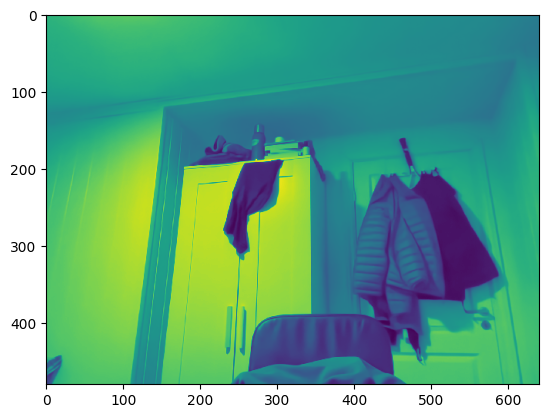

In [3]:

def take_image(number_of_images:int): 
    import numpy as np

    import cv2

    frameWidth = 640
    frameHeight = 480
    cap = cv2.VideoCapture(0)
    cap.set(3, frameWidth)
    cap.set(4, frameHeight)
    cap.set(10,150)

    images = []

    counter = 0

    while True:
        success, img = cap.read()
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        images.append(img)            
      
        counter += 1

        if cv2.waitKey(1) & 0xFF == ord('q') or counter == number_of_images:
            break

    return images 
    




def calculate_background(): 

    import numpy as np

    images = take_image(8)
    
    background_image = np.zeros(shape=images[0].shape) 
    
    for image in images: 
        background_image += image

    background_image = background_image/8 

    return background_image


I_b = calculate_background()

import matplotlib.pyplot as plt

plt.imshow(I_b)
    
I_b.shape


In [4]:
import cv2 

I = take_image(4)[3]





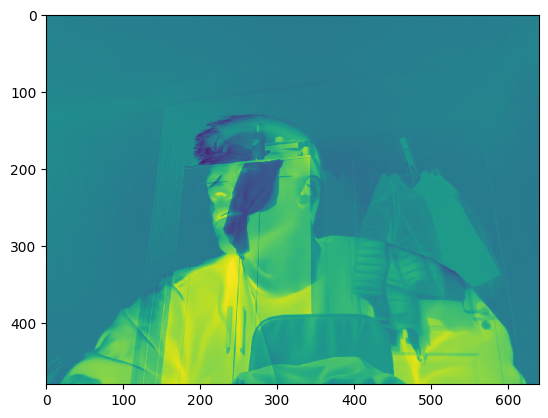

In [5]:
I_diff = I_b - I 

plt.imshow(I_diff)

In [8]:
import cv2
import numpy as np 

frameWidth = 640
frameHeight = 480
cap = cv2.VideoCapture(0)
cap.set(3, frameWidth)
cap.set(4, frameHeight)
cap.set(10,150)

images = []

while True:

    I_diff = []

    I_sum = 0

    success, img = cap.read()
 
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    images.append(img)

    for image in images: 
        i = image - I_b
        I_diff.append(i) 

    for image in I_diff: 
        I_sum += image


    if len(images) > 8: 
        images.pop(0)


    I_diff = np.array(I_diff).astype(np.uint8)

    cv2.imshow("Result", I_sum)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

2024-02-13 21:27:42.500 Python[52713:8865405] WARNING: Secure coding is not enabled for restorable state! Enable secure coding by implementing NSApplicationDelegate.applicationSupportsSecureRestorableState: and returning YES.


KeyboardInterrupt: 

: 